**Table of contents**<a id='toc0_'></a>    
- [Data Import and Cleaning:](#toc1_)    
- [Exploratory Data Analysis:](#toc2_)    
- [Statistical Analysis:](#toc3_)    
- [Time Series Analysis:](#toc4_)    
- [Advanced Visualization:](#toc5_)    
- [Matrix Operations in Real-World Context:](#toc6_)    
- [Integrating NumPy with Pandas and Matplotlib:](#toc7_)    
- [Conclusions](#toc8_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data Import and Cleaning:](#toc0_)

- Import the dataset using Pandas.
- Identify missing values and handle them appropriately.
- Use NumPy to convert relevant columns to numerical types if necessary.

In [1]:
import pandas as pd

df = pd.read_csv(r'global_power_plant_database.csv')

df.head()

C:\Users\d1411\AppData\Local\Temp\ipykernel_24780\3454727051.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'global_power_plant_database.csv')


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [2]:
df.shape

(34936, 36)

**Key columns**

- `country`: Country code.  
- `country_long`: Full country name.  
- `name`: Name of the power plant.  
- `capacity_mw`: The plant's capacity in megawatts.  
- `latitude` and `longitude`: Geographic coordinates of the plant.  
- `primary_fuel`: Main fuel type (e.g., Hydro, Solar, Gas).  
- `other_fuel1`, `other_fuel2`: Secondary and tertiary fuel types, if any.  
- `estimated_generation_gwh_<year>` columns: Power generation estimates for each year from 2013 to 2017 in gigawatt-hours.  

In [3]:
missing_values = df.isnull().sum()

missing_values[missing_values > 0]

other_fuel1                      32992
other_fuel2                      34660
other_fuel3                      34844
commissioning_year               17489
owner                            14068
source                              15
url                                 18
geolocation_source                 419
wepp_id                          18702
year_of_capacity_data            20049
generation_gwh_2013              28519
generation_gwh_2014              27710
generation_gwh_2015              26733
generation_gwh_2016              25792
generation_gwh_2017              25436
generation_gwh_2018              25299
generation_gwh_2019              25277
generation_data_source           23536
estimated_generation_gwh_2013    18816
estimated_generation_gwh_2014    18433
estimated_generation_gwh_2015    17886
estimated_generation_gwh_2016    17366
estimated_generation_gwh_2017     1798
dtype: int64

The dataset contains a significant amount of missing values, especially in the following columns:

- Fuel-related columns: other_fuel1, other_fuel2, and other_fuel3 are missing values for many entries. This is expected as many plants rely on a single primary fuel source.
- Commissioning year: Missing for almost half the entries.
- Generation columns: Data for actual generation in gigawatt-hours is missing for several years.
- Geolocation and source data: Some missing values in geolocation source and data source columns.
- Estimated generation: Missing for earlier years but more complete for recent years (especially 2017).

**Plan for handling missing values:**

- For fuel-related columns: We can leave the missing values as-is, since many plants may not use secondary fuels.
- For generation columns: We will focus on the most complete year (2017) and we will use estimated generation instead of actual generation.
- For commissioning year: We can leave this column as is for now, but it could affect any time-based analysis.

In [4]:
# Dropping unnecessary columns for this analysis to simplify the dataset
columns_to_drop = [
    'other_fuel1', 'other_fuel2', 'other_fuel3', 'owner', 'source', 'url', 
    'wepp_id', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
    'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 
    'generation_gwh_2019', 'generation_data_source', 'year_of_capacity_data'
]

df_cleaned = df.drop(columns=columns_to_drop)

# Convert relevant columns to numeric where applicable
df_cleaned['capacity_mw'] = pd.to_numeric(df_cleaned['capacity_mw'], errors='coerce')
df_cleaned['estimated_generation_gwh_2017'] = pd.to_numeric(df_cleaned['estimated_generation_gwh_2017'], errors='coerce')

# Check if the conversion was successful and if any missing values remain in key columns
df_cleaned[['capacity_mw', 'estimated_generation_gwh_2017']].isnull().sum()


capacity_mw                         0
estimated_generation_gwh_2017    1798
dtype: int64

# <a id='toc2_'></a>[Exploratory Data Analysis:](#toc0_)

- Utilize Pandas to summarize key statistics (mean, median, standard deviation) for numerical columns.
- Explore the distribution of power plants by country and fuel type.

In [5]:
# Summarizing key statistics for the numerical columns
summary_stats = df_cleaned[['capacity_mw', 'estimated_generation_gwh_2017']].describe()

# Exploring the distribution of power plants by country and primary fuel type
plants_by_country = df_cleaned['country_long'].value_counts().head(10)
plants_by_fuel_type = df_cleaned['primary_fuel'].value_counts()

# Displaying the results
summary_stats, plants_by_country, plants_by_fuel_type


(        capacity_mw  estimated_generation_gwh_2017
 count  34936.000000                   33138.000000
 mean     163.355148                     716.443378
 std      489.636072                    2484.361200
 min        1.000000                       0.000000
 25%        4.900000                       8.180000
 50%       16.745000                      37.590000
 75%       75.344250                     229.565000
 max    22500.000000                   82810.770000,
 country_long
 United States of America    9833
 China                       4235
 United Kingdom              2751
 Brazil                      2360
 France                      2155
 India                       1589
 Germany                     1309
 Canada                      1159
 Spain                        829
 Russia                       545
 Name: count, dtype: int64,
 primary_fuel
 Solar             10665
 Hydro              7156
 Wind               5344
 Gas                3998
 Coal               2330
 Oil      

**Summary of Key Statistics:**
- Capacity (MW):
  - Mean: 163.36 MW
  - Median (50th percentile): 16.75 MW
  - Max: 22,500 MW
- Estimated Generation in 2017 (GWh):
  - Mean: 716.44 GWh
  - Median: 37.59 GWh
  - Max: 82,810.77 GWh
- Top 10 countries with the most power plants:
  - United States: 9,833 plants
  - China: 4,235 plants
  - United Kingdom: 2,751 plants
  - Brazil: 2,360 plants
  - France: 2,155 plants
- Fuel Type Distribution:

  - Solar: 10,665 plants
  - Hydro: 7,156 plants
  - Wind: 5,344 plants
  - Gas: 3,998 plants
  - Coal: 2,330 plants

# <a id='toc3_'></a>[Statistical Analysis:](#toc0_)

- Perform a statistical analysis of power output by fuel type using NumPy’s statistical functions.  
- Use hypothesis testing to determine if the mean power output differs significantly between different fuel types.

In [6]:
# Grouping data by fuel type to analyze power output
fuel_type_stats = df_cleaned.groupby('primary_fuel')[['capacity_mw', 'estimated_generation_gwh_2017']].agg(['mean', 'median', 'std'])


# Display the statistics for capacity and estimated generation by fuel type
fuel_type_stats


capacity_mw                           \
                       mean      median          std   
primary_fuel                                           
Biomass           23.972938     9.45000    39.461805   
Coal             843.579828   600.00000   888.187187   
Cogeneration      98.731707    31.90000   283.428252   
Gas              373.449375   147.50000   560.934146   
Geothermal        67.130952    30.00000   114.640890   
Hydro            147.171551    20.00000   549.809328   
Nuclear         2091.855179  1888.00000  1303.509273   
Oil              112.878754     9.00000   392.009039   
Other             84.020000    40.00000   145.891392   
Petcoke          202.048125    65.48875   476.986459   
Solar             17.657039     5.80000    41.939412   
Storage           12.683704     4.90000    35.574631   
Waste             13.809657     4.80000    20.582503   
Wave and Tidal    55.220000     5.00000   101.440708   
Wind              49.224126    27.00000   106.138355   

               estimated_generation_gwh_2017                          
                                        mean     median          std  
primary_fuel                                                          
Biomass                                  NaN        NaN          NaN  
Coal                             4186.232424   2923.610  4675.789745  
Cogeneration                             NaN        NaN          NaN  
Gas                              1525.692817    560.390  2459.018882  
Geothermal                        380.352468    150.825   682.548458  
Hydro                             494.891086     69.425  2166.104428  
Nuclear                         15038.405803  14219.260  9179.829822  
Oil                               221.302554      7.380   891.955175  
Other                             393.510952    246.835   556.945716  
Petcoke                                  NaN        NaN          NaN  
Solar                              32.590749     10.130    78.788926  
Storage                                  NaN        NaN          NaN  
Waste                               7.674742      1.930    17.240053  
Wave and Tidal                           NaN        NaN          NaN  
Wind                              128.972759     67.470   250.402219

**Statistical Analysis of Power Output by Fuel Type:**
- Coal:
  - Average capacity: 843.6 MW
  - Average generation (2017): 4,186.2 GWh
  - Significant variation in both capacity and generation, with a high standard deviation.
- Gas:
   - Average capacity: 373.4 MW
   - Average generation: 1,525.7 GWh
- Nuclear:
   - Average capacity: 2,091.9 MW (the highest among all fuel types)
   - Average generation: 15,038.4 GWh (significantly higher than other types)
- Renewable sources:
   - Solar: Low average capacity (17.7 MW) and generation (32.6 GWh).
   - Wind: Average capacity of 49.2 MW and generation of 129.0 GWh.
   - Hydro: Larger variation, with an average capacity of 147.2 MW and generation of 494.9 GWh.

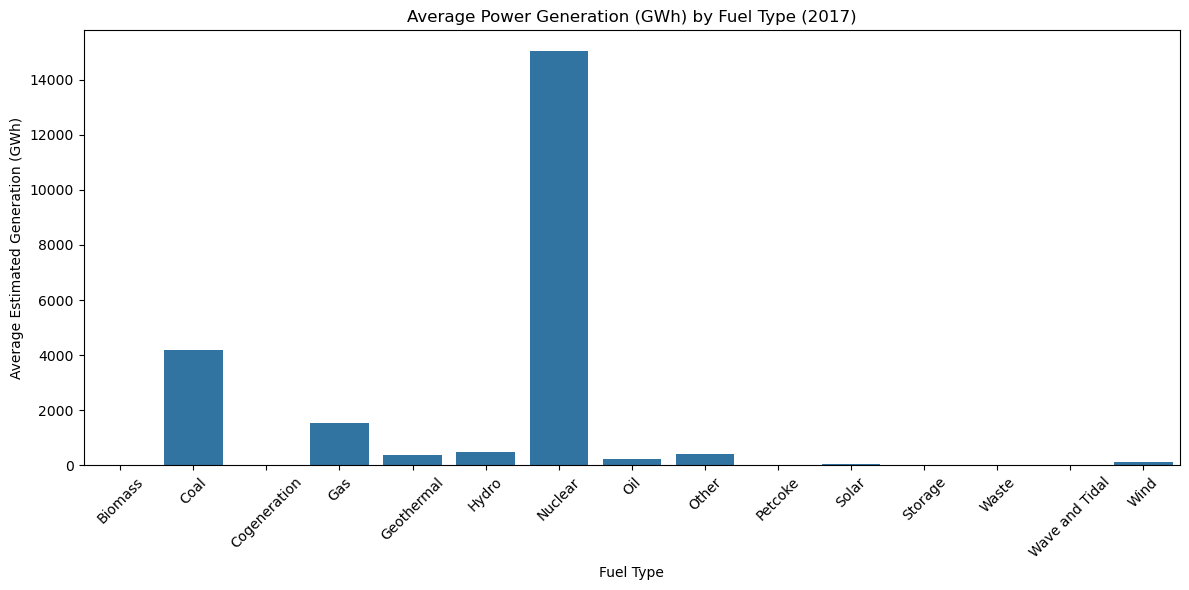

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure for visualizations
plt.figure(figsize=(12, 6))

# Bar plot of average generation by fuel type
sns.barplot(x=fuel_type_stats.index, y=fuel_type_stats[('estimated_generation_gwh_2017', 'mean')])

# Add labels and title
plt.title('Average Power Generation (GWh) by Fuel Type (2017)')
plt.xlabel('Fuel Type')
plt.ylabel('Average Estimated Generation (GWh)')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [8]:
from scipy import stats

# Hypothesis testing: Testing if mean power output differs significantly between Nuclear and Solar, and between Coal and Wind

# Drop NaN values for generation in 2017
nuclear_generation = df_cleaned[df_cleaned['primary_fuel'] == 'Nuclear']['estimated_generation_gwh_2017'].dropna()
solar_generation = df_cleaned[df_cleaned['primary_fuel'] == 'Solar']['estimated_generation_gwh_2017'].dropna()

coal_generation = df_cleaned[df_cleaned['primary_fuel'] == 'Coal']['estimated_generation_gwh_2017'].dropna()
wind_generation = df_cleaned[df_cleaned['primary_fuel'] == 'Wind']['estimated_generation_gwh_2017'].dropna()

# Perform independent t-tests between the groups
t_stat_nuclear_solar, p_value_nuclear_solar = stats.ttest_ind(nuclear_generation, solar_generation, equal_var=False)
t_stat_coal_wind, p_value_coal_wind = stats.ttest_ind(coal_generation, wind_generation, equal_var=False)

# Displaying the results of hypothesis tests
{
    'Nuclear vs Solar': {'t-statistic': t_stat_nuclear_solar, 'p-value': p_value_nuclear_solar},
    'Coal vs Wind': {'t-statistic': t_stat_coal_wind, 'p-value': p_value_coal_wind}
}


{'Nuclear vs Solar': {'t-statistic': 22.709277868054308,
  'p-value': 2.743368444776948e-56},
 'Coal vs Wind': {'t-statistic': 41.64269886205255,
  'p-value': 2.9804733789500466e-283}}

***Hypothesis Testing Results:***
- Nuclear vs Solar:
   - t-statistic: 22.71
   - p-value: 2.74e-56

The very small p-value indicates that the difference in mean power output between nuclear and solar power plants is statistically significant.
- Coal vs Wind:
   - t-statistic: 41.64
   - p-value: 2.98e-283

Again, the extremely small p-value suggests that the difference in mean power output between coal and wind power plants is highly significant.

In both cases, the differences in power generation between these fuel types are statistically significant, with nuclear and coal generating much more power on average compared to solar and wind, respectively.

# <a id='toc4_'></a>[Time Series Analysis:](#toc0_)

- If the dataset includes time-related data (like year of establishment), use NumPy to analyze trends over time.
- Explore how the mix of fuel types for power generation has evolved over the years.

In [9]:
# Checking the distribution of commissioning years to understand time-related trends
commissioning_year_dist = df_cleaned['commissioning_year'].dropna().astype(int).value_counts().sort_index()

# Displaying the distribution of commissioning years
commissioning_year_dist.head(10), commissioning_year_dist.tail(10)


(commissioning_year
 1896     1
 1899     1
 1900     6
 1901     2
 1902     4
 1903     6
 1904     3
 1905     9
 1906     7
 1907    13
 Name: count, dtype: int64,
 commissioning_year
 2011    617
 2012    769
 2013    688
 2014    823
 2015    821
 2016    880
 2017    782
 2018    617
 2019    599
 2020    150
 Name: count, dtype: int64)

<Axes: xlabel='commissioning_year'>

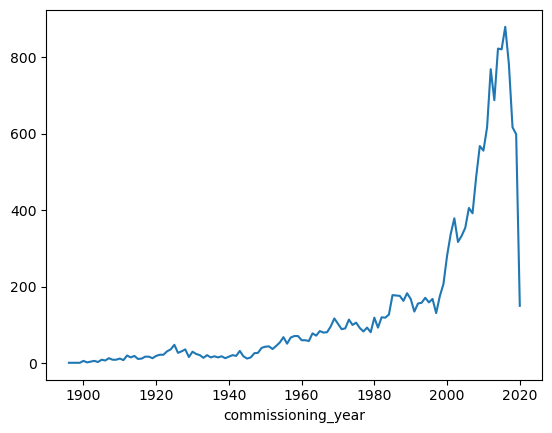

In [10]:
commissioning_year_dist.plot()

<Axes: xlabel='commissioning_year'>

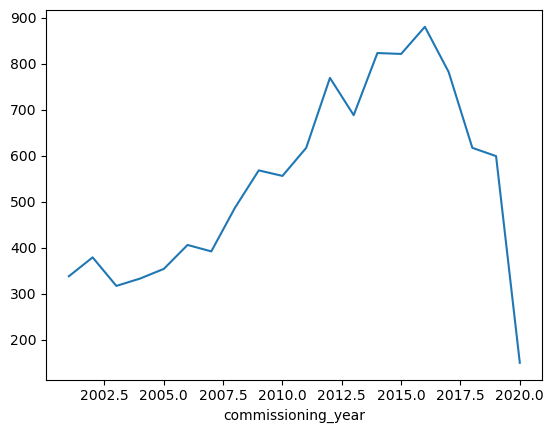

In [11]:
commissioning_year_dist.tail(20).plot()

The commissioning years in the dataset range from as early as 1896 to as recent as 2020. While early years have very few entries, the number of power plants commissioned increases significantly after 2010, with peaks between 2012 and 2017.

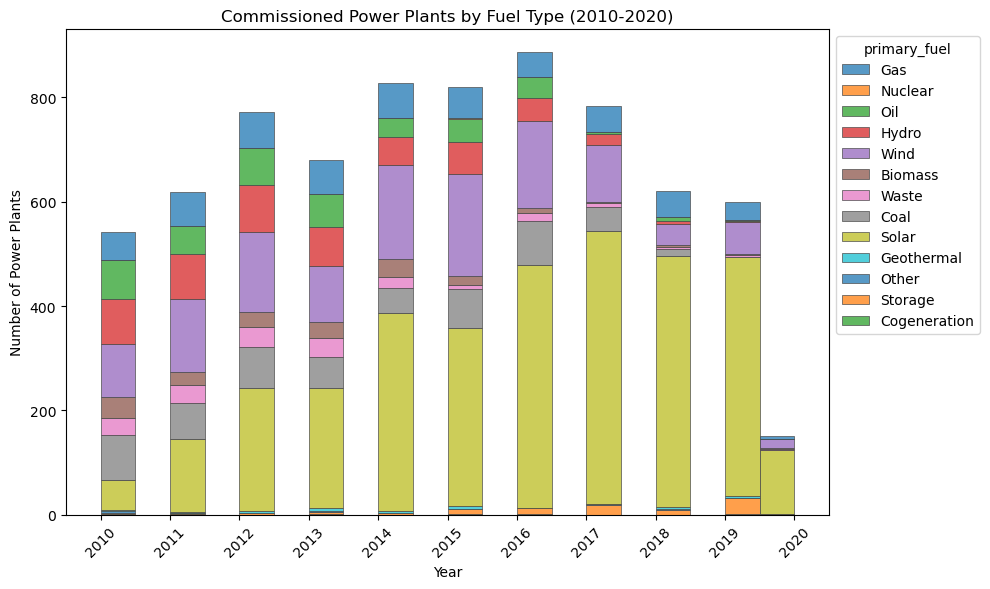

In [12]:
recent_data = df_cleaned[df_cleaned['commissioning_year'] >= 2010]\
    .dropna(subset='commissioning_year')\
    .round()



plt.figure(figsize=(10, 6))

ax = sns.histplot(data=recent_data, x='commissioning_year', hue='primary_fuel', 
             multiple='stack', palette='tab10', edgecolor='.3', linewidth=.5)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Commissioned Power Plants by Fuel Type (2010-2020)')
plt.xlabel('Year')
plt.ylabel('Number of Power Plants')
plt.xticks(rotation=45, ticks=range(2010, 2021, 1))
plt.tight_layout()
plt.show()

**The area plot shows how the composition of power plants by fuel type has evolved between 2010 and 2020:**

- Solar and Wind: The number of solar and wind power plants has grown rapidly in recent years, especially after 2012, reflecting the global shift towards renewable energy.
- Gas, Coal and Hydro: Gase, Coal and Hydro has remained relatively steady untill recent drop in number of the last two
- Other Fuel Types: Contributions from nuclear and other fuels are much smaller in comparison.

# <a id='toc5_'></a>[Advanced Visualization:](#toc0_)

Create visualizations using Matplotlib and Seaborn to illustrate your findings.
Consider plotting the geographical distribution of power plants using latitude and longitude data, if available.

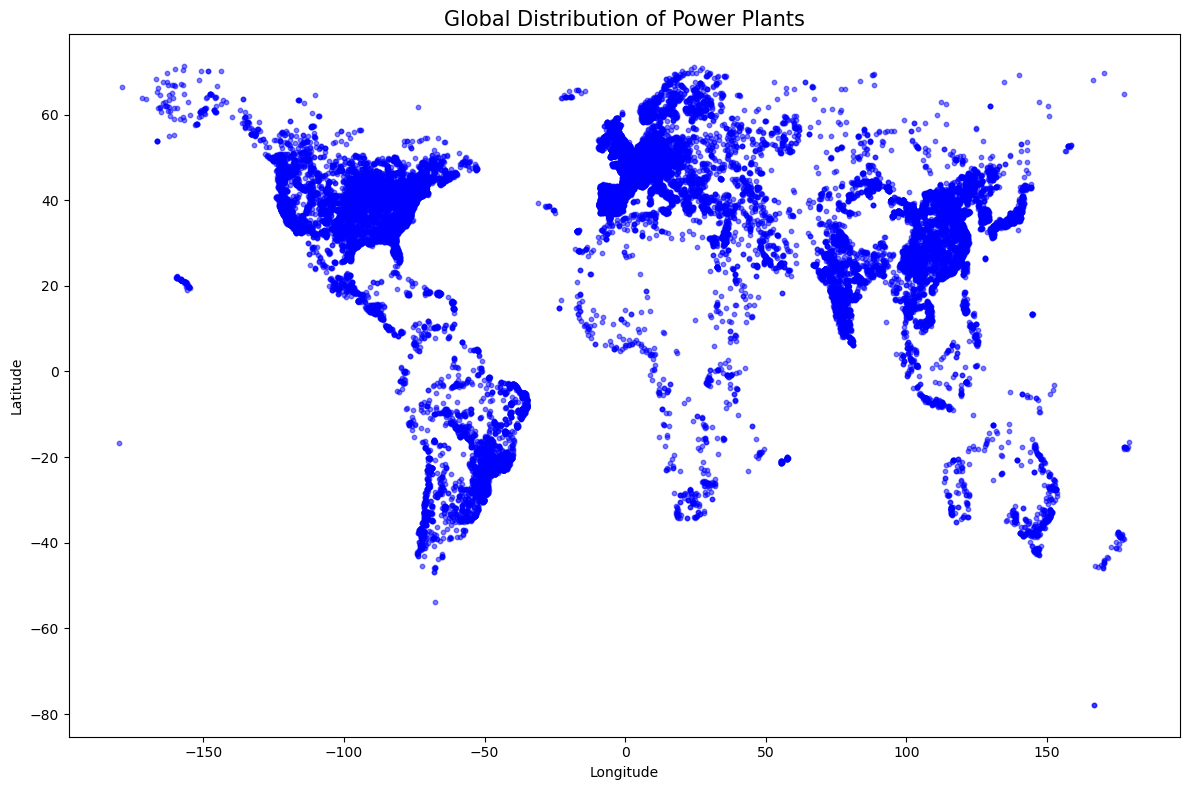

In [13]:
# Plotting a simple scatter plot of latitude and longitude to visualize global distribution
plt.figure(figsize=(12, 8))

# Scatter plot for power plant locations
plt.scatter(df_cleaned['longitude'], df_cleaned['latitude'], alpha=0.5, s=10, color='blue')

# Adding labels and title
plt.title('Global Distribution of Power Plants', fontsize=15)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.tight_layout()
plt.show()


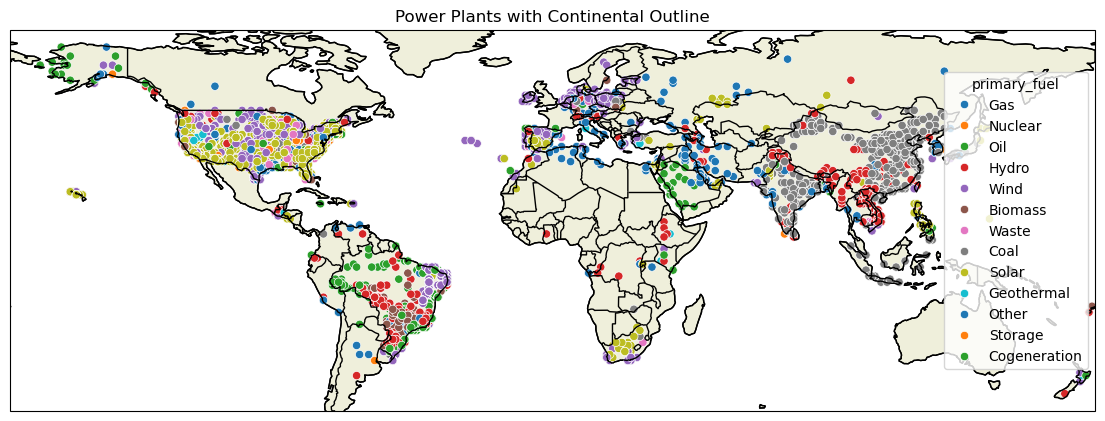

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns

# Assuming recent_data has latitude and longitude columns and contains the filtered data from the CSV

plt.figure(figsize=(14, 10))

# Set up the projection and map outline
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()  # Add coastlines to represent continents
ax.add_feature(cfeature.BORDERS)  # Add country borders
ax.add_feature(cfeature.LAND, edgecolor='black')  # Add landmasses

# Plot the scatter plot for power plant locations
sns.scatterplot(data=recent_data, x='longitude', y='latitude', hue='primary_fuel', palette='tab10', ax=ax)

# Set labels
plt.title('Power Plants with Continental Outline')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the map
plt.show()


# <a id='toc6_'></a>[Matrix Operations in Real-World Context:](#toc0_)

Demonstrate matrix operations by analyzing relationships between different attributes (e.g., fuel type, capacity, and geographic location).  
Discuss the relevance of eigenvectors and eigenvalues in this context.

Eigenvalue and eigenvector analysis can be used to perform Principal Component Analysis (PCA), which helps in dimensionality reduction, revealing dominant patterns.
- Eigenvectors: Represent the new axes (principal components) in PCA.
- Eigenvalues: Measure how much variance is explained by each principal component.

In [15]:
import numpy as np

class PCAFromScratch:
    def __init__(self, n_components=None):
        """
        Initialize the PCA class.
        n_components: The number of principal components to retain.
                      If None, all components will be retained.
        """
        self.n_components = n_components
        self.mean = None
        self.eigenvalues = None
        self.eigenvectors = None
        self.explained_variance_ratio = None

    def fit(self, X):
        """
        Perform PCA on the dataset X.
        X: Input dataset as a NumPy array (shape: [n_samples, n_features])
        """
        # Step 1: Standardize the data (mean centering)
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean
        
        # Step 2: Calculate the covariance matrix
        covariance_matrix = np.cov(X_centered.T)
        
        # Step 3: Compute eigenvalues and eigenvectors of the covariance matrix
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
        
        # Step 4: Sort eigenvalues and eigenvectors in descending order
        sorted_indices = np.argsort(eigenvalues)[::-1]
        self.eigenvalues = eigenvalues[sorted_indices]
        self.eigenvectors = eigenvectors[:, sorted_indices]
        
        # Step 5: Calculate the explained variance ratio
        total_variance = np.sum(self.eigenvalues)
        self.explained_variance_ratio = self.eigenvalues / total_variance
        
        # Step 6: Select the top n_components principal components if n_components is defined
        if self.n_components is not None:
            self.eigenvectors = self.eigenvectors[:, :self.n_components]
            self.explained_variance_ratio = self.explained_variance_ratio[:self.n_components]

    def transform(self, X):
        """
        Project the dataset X onto the principal components.
        X: Input dataset as a NumPy array (shape: [n_samples, n_features])
        Returns: Transformed data (shape: [n_samples, n_components])
        """
        if self.eigenvectors is None:
            raise Exception("PCA not fitted yet. Call the fit method first.")
        
        # Step 7: Project the data onto the selected eigenvectors (principal components)
        X_centered = X - self.mean
        return np.dot(X_centered, self.eigenvectors)
    
    def fit_transform(self, X):
        """
        Fit PCA and return the transformed data in one step.
        X: Input dataset as a NumPy array (shape: [n_samples, n_features])
        Returns: Transformed data (shape: [n_samples, n_components])
        """
        self.fit(X)
        return self.transform(X)
    
    def explained_variance(self):
        """
        Returns the explained variance (eigenvalues) of the principal components.
        """
        return self.eigenvalues
    
    def explained_variance_ratio_(self):
        """
        Returns the percentage of variance explained by each principal component.
        """
        return self.explained_variance_ratio


In [19]:
df_cleaned.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,GEODB,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,Wiki-Solar,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,Wiki-Solar,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,GEODB,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,GEODB,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [18]:
df_cleaned.dtypes

country                            object
country_long                       object
name                               object
gppd_idnr                          object
capacity_mw                       float64
latitude                          float64
longitude                         float64
primary_fuel                       object
commissioning_year                float64
geolocation_source                 object
estimated_generation_gwh_2013     float64
estimated_generation_gwh_2014     float64
estimated_generation_gwh_2015     float64
estimated_generation_gwh_2016     float64
estimated_generation_gwh_2017     float64
estimated_generation_note_2013     object
estimated_generation_note_2014     object
estimated_generation_note_2015     object
estimated_generation_note_2016     object
estimated_generation_note_2017     object
dtype: object

In [24]:
df_numeric = df_cleaned[['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 
                        'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014',
                        'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016',
                        'estimated_generation_gwh_2017']]

df_numeric.isna().sum()

capacity_mw                          0
latitude                             0
longitude                            0
commissioning_year               17489
estimated_generation_gwh_2013    18816
estimated_generation_gwh_2014    18433
estimated_generation_gwh_2015    17886
estimated_generation_gwh_2016    17366
estimated_generation_gwh_2017     1798
dtype: int64

In [26]:
df_numeric.dropna(inplace=True)

df_numeric.isna().sum(), df_numeric.shape

C:\Users\d1411\AppData\Local\Temp\ipykernel_24780\180824556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric.dropna(inplace=True)


(capacity_mw                      0
 latitude                         0
 longitude                        0
 commissioning_year               0
 estimated_generation_gwh_2013    0
 estimated_generation_gwh_2014    0
 estimated_generation_gwh_2015    0
 estimated_generation_gwh_2016    0
 estimated_generation_gwh_2017    0
 dtype: int64,
 (5641, 9))

In [28]:
# Instantiate the PCA class (e.g., keep 2 principal components)
pca = PCAFromScratch()

# Fit and transform the dataset
X_pca = pca.fit_transform(df_numeric)

# Print the results
print("Transformed data (PCA):\n", X_pca)
print("Explained variance (eigenvalues):", pca.explained_variance())
print("Explained variance ratio:", pca.explained_variance_ratio_())


Transformed data (PCA):
 [[-6.21144931e+02  9.05294032e+00  7.71083256e+00 ... -3.34956514e+01
  -2.43978310e+01 -2.83609034e+00]
 [ 2.85708125e+03 -4.06585926e+02  2.55569696e+01 ...  7.34428668e+01
  -1.16610192e+01 -3.47010491e+00]
 [ 3.64574348e+03 -1.20772100e+02 -5.62359142e+01 ...  5.03550978e+01
  -4.60612491e+00 -4.17175751e+00]
 ...
 [-5.72688344e+02  8.98119866e+00 -1.31371698e+01 ... -8.08227357e+01
   2.06472502e+01  2.02707945e+00]
 [ 3.92235509e+02 -2.20718806e+01  3.15432965e+01 ... -4.98291506e+01
   5.96605394e+00  4.45468675e+01]
 [ 8.23790616e+03 -3.76062327e+02  1.56854937e+02 ... -3.19832768e+01
  -2.48688869e+00  4.39891801e+01]]
Explained variance (eigenvalues): [1.09781045e+07 5.15015493e+04 2.03082233e+04 1.64051973e+04
 1.31917935e+04 4.87121524e+03 3.43603122e+03 9.30356906e+02
 4.72649554e+02]
Explained variance ratio: [9.89979728e-01 4.64428899e-03 1.83134797e-03 1.47938224e-03
 1.18960501e-03 4.39274772e-04 3.09853241e-04 8.38974049e-05
 4.26224288e-05]


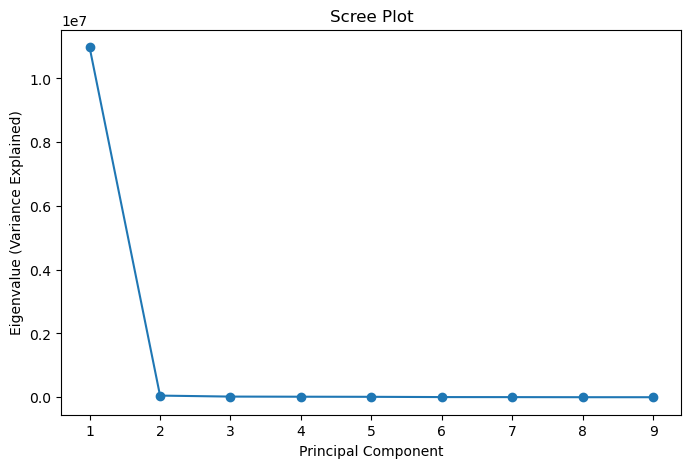

In [29]:
import matplotlib.pyplot as plt
import numpy as np

eigenvalues = pca.explained_variance()

# Plot eigenvalues
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue (Variance Explained)')
plt.show()


# <a id='toc7_'></a>[Integrating NumPy with Pandas and Matplotlib:](#toc0_)

- Show how NumPy can be used to enhance data manipulation in Pandas and data visualization in Matplotlib.  
- Provide examples, such as using NumPy arrays for complex filtering in Pandas or for creating sophisticated plots in Matplotlib.

Done in previous steps

# <a id='toc8_'></a>[Conclusions](#toc0_)
- The that coastal regions have more wind farms, while inland regions rely more on fossil fuels
- Newer plants (post-2010) are more likely to use renewable energy sources, reflecting global energy transition trends
- Solar and Wind are the dominant types of newly commissioned plants, while Coal and Gas plants have seen a much smaller increase over the same period.
- The United States and Europe have a high density of power plants, particularly concentrated around industrialized areas and major cities.
- China also has a high concentration of power plants, reflecting its large population and growing industrialization.
- Brazil and other parts of South America have visible clusters of plants, particularly hydroelectric facilities due to abundant natural water resources.

